- ### load data

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values

- ### init labels

In [149]:
label = []
for i in range(len(data)):
    label.append([i % 5 + 1])

label = np.array(label)
data = np.concatenate((data, label), axis=1)
init_data = data.view()

- ### Compute init Centroids

In [150]:
init_Centroids = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

for i in range(data.shape[0]):
    if data[i][2] == 1:
        init_Centroids[0][0] += data[i][0] / 40
        init_Centroids[0][1] += data[i][1] / 40
 
    elif data[i][2] == 2:
        init_Centroids[1][0] += data[i][0] / 40
        init_Centroids[1][1] += data[i][1] / 40

    elif data[i][2] == 3:
        init_Centroids[2][0] += data[i][0] / 40
        init_Centroids[2][1] += data[i][1] / 40
        
    elif data[i][2] == 4:
        init_Centroids[3][0] += data[i][0] / 40
        init_Centroids[3][1] += data[i][1] / 40
        
    elif data[i][2] == 5:
        init_Centroids[4][0] += data[i][0] / 40
        init_Centroids[4][1] += data[i][1] / 40

- ### Define functions

In [151]:
def compute_distance(a, b):
    # distance between a and b
    dist = math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

    return dist

In [152]:
def compute_centroid(Z):
    center = [[0, 0] for i in range(5)]
    cluster_n = [0 for i in range(5)]
    
    for i in range(data.shape[0]):
        if Z[i][2] == 1:
            center[0][0] += data[i][0]
            center[0][1] += data[i][1]
            cluster_n[0] +=1

        elif Z[i][2] == 2:
            center[1][0] += data[i][0]
            center[1][1] += data[i][1] 
            cluster_n[1] +=1

        elif Z[i][2] == 3:
            center[2][0] += data[i][0]
            center[2][1] += data[i][1]
            cluster_n[2] +=1

        elif Z[i][2] == 4:
            center[3][0] += data[i][0] 
            center[3][1] += data[i][1] 
            cluster_n[3] +=1

        elif Z[i][2] == 5:
            center[4][0] += data[i][0] 
            center[4][1] += data[i][1] 
            cluster_n[4] +=1
    
    for i in range(len(center)):
        center[i][0] = center[i][0] / cluster_n[i]
        center[i][1] = center[i][1] / cluster_n[i]
    
    return center

In [153]:
def compute_label(z, M):
    
    distance_list = [compute_distance(z, M[i]) for i in range(len(M))]
    label = distance_list.index(min(distance_list)) + 1
    
    return label

In [154]:
def compute_loss(C, M):
    loss = 0
    
    for i in range(C.shape[0]):
        loss += compute_distance(C[i], M[C[i][2] - 1])
        
    return loss / C.shape[0]

- ### main code

In [155]:
loss_curve = []
centroid_curv = [[] for i in range(5)]
ephochs = 100

In [156]:
for run in range(ephochs):
    Centroids = compute_centroid(data)

    for i in range(data.shape[0]):
        data[i][2] = compute_label(data[i], Centroids)
    loss_curve.append(compute_loss(data, Centroids))
    
    for j in range(len(centroid_curv)):
        centroid_curv[j].append(compute_distance([0, 0], Centroids[j]))

## 1. Plot the data points [1pt]

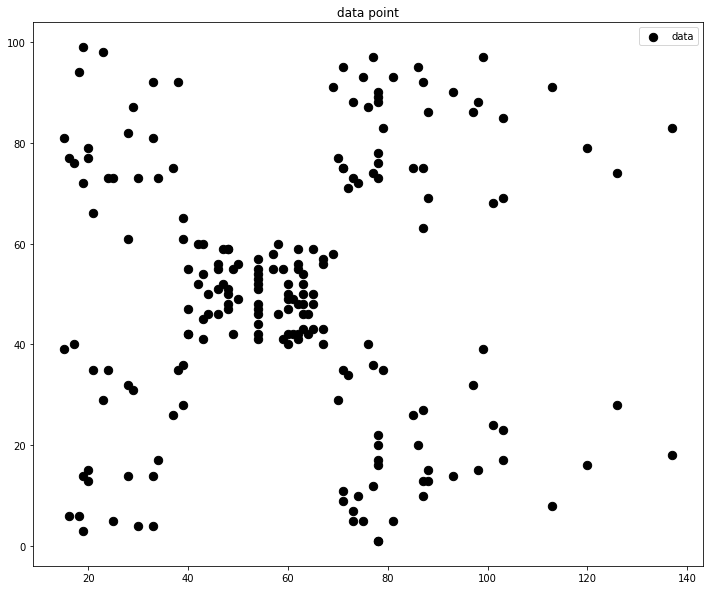

In [157]:
fig = plt.figure(figsize=(12,10))
plt.scatter(data[:,0], data[:,1], s =70, c = 'black', label='data')
plt.title("data point")
plt.legend()
plt.show()

## 2. Visualise the initial condition of the point labels [1pt]

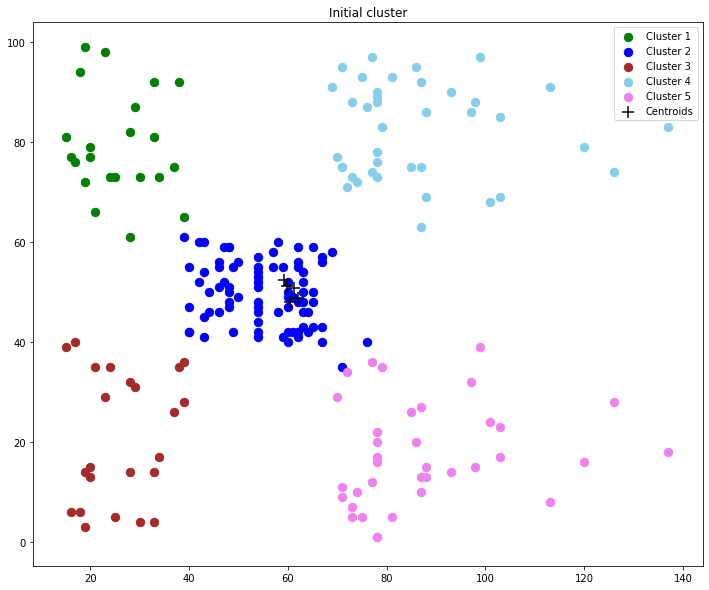

In [158]:
Cluster1 = []
Cluster2 = []
Cluster3 = []
Cluster4 = []
Cluster5 = []
color_list = ["green", "blue", "brown", "skyblue", "violet"]
name_list = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]

fig = plt.figure(figsize=(12,10))
for i in range(init_data.shape[0]):
    if data[i][2] == 1:
        Cluster1.append(init_data[i])
 
    elif data[i][2] == 2:
        Cluster2.append(init_data[i])

        
    elif data[i][2] == 3:
        Cluster3.append(init_data[i])

        
    elif data[i][2] == 4:
        Cluster4.append(init_data[i])

        
    elif data[i][2] == 5:
        Cluster5.append(init_data[i])

plt.scatter(np.array(Cluster1)[:,0], np.array(Cluster1)[:,1], s = 70, c = color_list[0], label = name_list[0])
plt.scatter(np.array(Cluster2)[:,0], np.array(Cluster2)[:,1], s = 70, c = color_list[1], label = name_list[1])
plt.scatter(np.array(Cluster3)[:,0], np.array(Cluster3)[:,1], s = 70, c = color_list[2], label = name_list[2])
plt.scatter(np.array(Cluster4)[:,0], np.array(Cluster4)[:,1], s = 70, c = color_list[3], label = name_list[3])
plt.scatter(np.array(Cluster5)[:,0], np.array(Cluster5)[:,1], s = 70, c = color_list[4], label = name_list[4])
plt.scatter(np.array(init_Centroids)[:,0], np.array(init_Centroids)[:,1], s = 150, c = 'black', marker = '+', label = "Centroids")


plt.title("Initial cluster")
plt.legend()
plt.show()

## 3. Plot the loss curve [5pt]

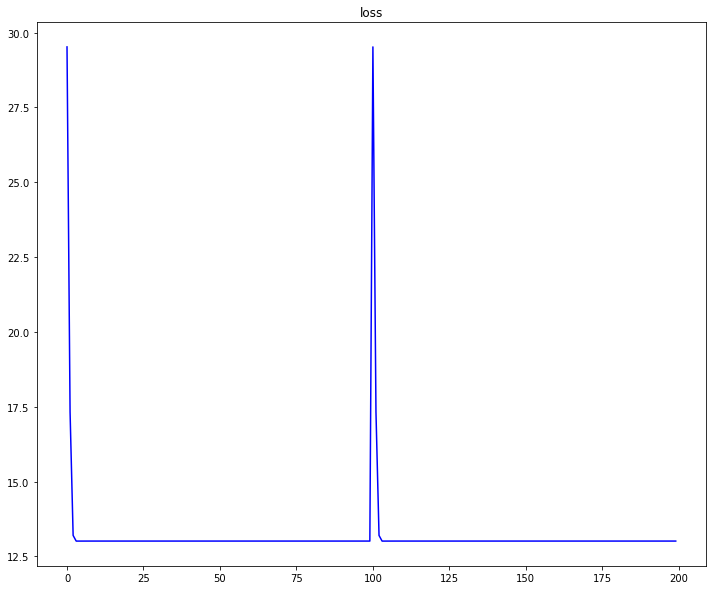

In [123]:
fig = plt.figure(figsize=(12,10))
plt.plot([i for i in range(len(loss_curve))], loss_curve, c = 'b')
plt.title('loss')
plt.show()

## 4. Plot the centroid of each clsuter [5pt]

## 5. Plot the final clustering result [5pt]

